In [4]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)

print(y)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'title': 'A data-driven approach to predict the success of bank telemarketing'

In [34]:
print(X)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married        NaN      no     1506     yes   no   
4       33           NaN    single        NaN      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day_of_week month  duration  camp

In [5]:
from pycaret.classification import *
import pandas as pd
categorical_columns = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_columns)
X_encoded.rename(columns={"job_admin." : "job_admin"}, inplace=True)
s = setup(X_encoded, target = y, session_id = 123)

       age  balance  day_of_week  duration  campaign  pdays  previous  \
0       58     2143            5       261         1     -1         0   
1       44       29            5       151         1     -1         0   
2       33        2            5        76         1     -1         0   
3       47     1506            5        92         1     -1         0   
4       33        1            5       198         1     -1         0   
...    ...      ...          ...       ...       ...    ...       ...   
45206   51      825           17       977         3     -1         0   
45207   71     1729           17       456         2     -1         0   
45208   72     5715           17      1127         5    184         3   
45209   57      668           17       508         4     -1         0   
45210   37     2971           17       361         2    188        11   

       job_admin  job_blue-collar  job_entrepreneur  ...  month_jul  \
0              0                0                 0 

,Description,Value
0,Session id,123
1,Target,poutcome_success
2,Target type,Binary
3,Original data shape,"(45211, 47)"
4,Transformed data shape,"(45211, 47)"
5,Transformed train set shape,"(31647, 47)"
6,Transformed test set shape,"(13564, 47)"
7,Numeric features,46
8,Preprocess,True
9,Imputation type,simple


In [32]:
print(X_encoded.columns)

Index(['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'job_admin', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success'],
      dtype='object')


In [ ]:
from pycaret.classification import ClassificationExperiment


exp = ClassificationExperiment()
type(exp)

exp.setup(X_encoded, target = y, session_id = 123)

,Description,Value
0,Session id,123
1,Target,poutcome_success
2,Target type,Binary
3,Original data shape,"(45211, 47)"
4,Transformed data shape,"(45211, 47)"
5,Transformed train set shape,"(31647, 47)"
6,Transformed test set shape,"(13564, 47)"
7,Numeric features,46
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9999,1.0000,1.0000,0.9981,0.9991,0.9990,0.9990,1.3630
gbc,Gradient Boosting Classifier,0.9999,0.9999,0.9991,0.9981,0.9986,0.9985,0.9985,3.1100
xgboost,Extreme Gradient Boosting,0.9999,1.0000,1.0000,0.9981,0.9991,0.9990,0.9990,0.5880
lightgbm,Light Gradient Boosting Machine,0.9999,1.0000,1.0000,0.9981,0.9991,0.9990,0.9990,1.0040
catboost,CatBoost Classifier,0.9999,1.0000,1.0000,0.9981,0.9991,0.9990,0.9990,9.9760
dt,Decision Tree Classifier,0.9997,0.9967,0.9934,0.9981,0.9957,0.9956,0.9956,0.1530
rf,Random Forest Classifier,0.9996,1.0000,0.9905,0.9981,0.9943,0.9941,0.9941,1.2970
et,Extra Trees Classifier,0.9962,0.9999,0.8876,0.9989,0.9397,0.9378,0.9396,1.7140
lda,Linear Discriminant Analysis,0.9850,0.9942,0.7268,0.8098,0.7650,0.7573,0.7590,0.3000
lr,Logistic Regression,0.9838,0.9871,0.6021,0.8764,0.7125,0.7045,0.7183,3.4120


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [35]:
best = compare_models(sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9999,1.0000,1.0000,0.9981,0.9991,0.9990,0.9990,1.2270
xgboost,Extreme Gradient Boosting,0.9999,1.0000,1.0000,0.9981,0.9991,0.9990,0.9990,0.4310
lightgbm,Light Gradient Boosting Machine,0.9999,1.0000,1.0000,0.9981,0.9991,0.9990,0.9990,1.5590
catboost,CatBoost Classifier,0.9999,1.0000,1.0000,0.9981,0.9991,0.9990,0.9990,9.5660
gbc,Gradient Boosting Classifier,0.9999,0.9999,0.9991,0.9981,0.9986,0.9985,0.9985,2.9890
dt,Decision Tree Classifier,0.9997,0.9967,0.9934,0.9981,0.9957,0.9956,0.9956,0.0950
rf,Random Forest Classifier,0.9996,1.0000,0.9905,0.9981,0.9943,0.9941,0.9941,1.3430
et,Extra Trees Classifier,0.9962,0.9999,0.8876,0.9989,0.9397,0.9378,0.9396,1.6960
lda,Linear Discriminant Analysis,0.9850,0.9942,0.7268,0.8098,0.7650,0.7573,0.7590,0.3750
lr,Logistic Regression,0.9845,0.9875,0.6097,0.8902,0.7211,0.7135,0.7283,2.9940


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9999,1.0000,1.0000,0.9981,0.9991,0.9990,0.9990,1.3010
gbc,Gradient Boosting Classifier,0.9999,0.9999,0.9991,0.9981,0.9986,0.9985,0.9985,3.0180
xgboost,Extreme Gradient Boosting,0.9999,1.0000,1.0000,0.9981,0.9991,0.9990,0.9990,0.5290
lightgbm,Light Gradient Boosting Machine,0.9999,1.0000,1.0000,0.9981,0.9991,0.9990,0.9990,0.8520
catboost,CatBoost Classifier,0.9999,1.0000,1.0000,0.9981,0.9991,0.9990,0.9990,9.7980
dt,Decision Tree Classifier,0.9997,0.9967,0.9934,0.9981,0.9957,0.9956,0.9956,0.0940
rf,Random Forest Classifier,0.9996,1.0000,0.9905,0.9981,0.9943,0.9941,0.9941,1.2790
et,Extra Trees Classifier,0.9962,0.9999,0.8876,0.9989,0.9397,0.9378,0.9396,1.6630
lda,Linear Discriminant Analysis,0.9850,0.9942,0.7268,0.8098,0.7650,0.7573,0.7590,0.2880
lr,Logistic Regression,0.9838,0.9871,0.6021,0.8764,0.7125,0.7045,0.7183,2.7090


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=None, learning_rate=1.0, n_estimators=50,
                   random_state=123)

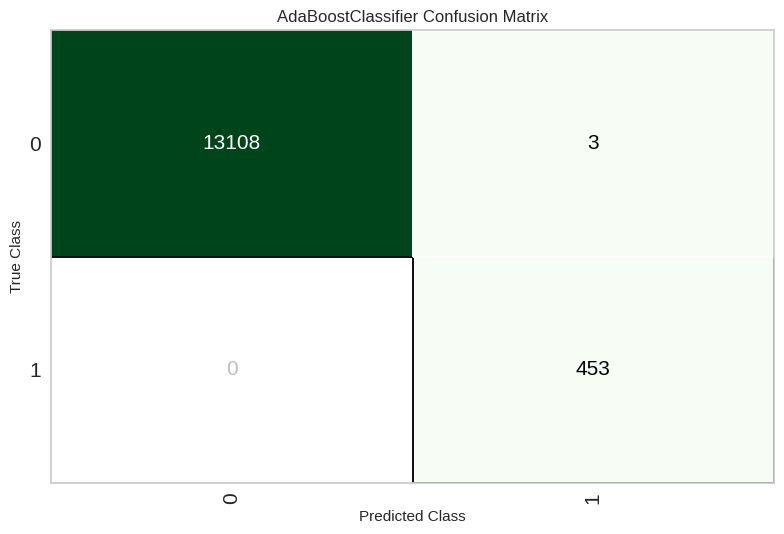

In [ ]:
plot_model(best, plot = 'confusion_matrix')

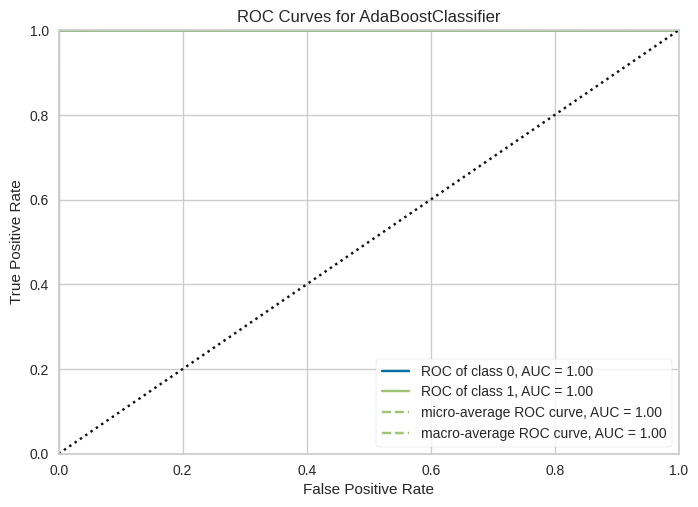

In [ ]:
plot_model(best, plot = 'auc')

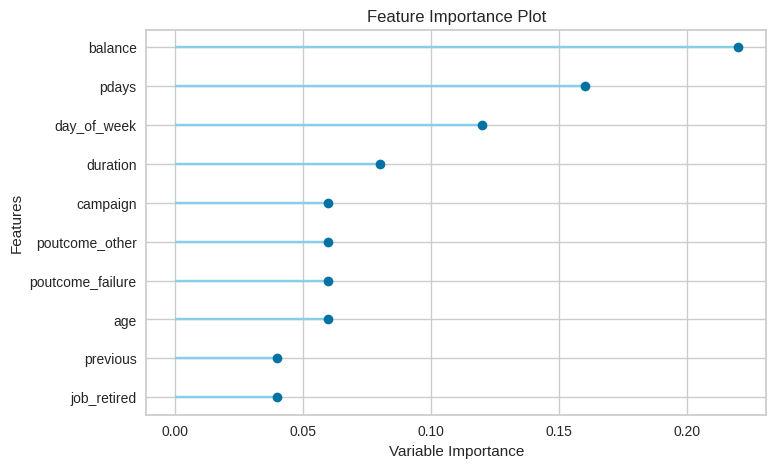

In [ ]:
plot_model(best, plot = 'feature')

In [ ]:
help(plot_model)

Help on function plot_model in module pycaret.classification.functional:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Optional[dict] = None, plot_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List of available plots (ID - Name):
    
        * 'pipeline'

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.9998,0.9999,1.0000,0.9934,0.9967,0.9966,0.9966


In [ ]:
holdout_pred.head()

,age,balance,day_of_week,duration,campaign,pdays,previous,job_admin,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,prediction_label,prediction_score
29589,51,605,3,91,2,159,14,0,0,0,...,0,0,0,0,0,1,0,0,0,0.7874
10930,38,258,17,88,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.6908
42729,40,1108,26,228,1,92,5,1,0,0,...,0,0,0,0,0,1,0,0,0,0.7787
40203,49,6574,8,138,3,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.7666
35876,38,215,8,124,2,353,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0.8144


In [ ]:
new_data = X_encoded.copy()


new_data.head()

,age,balance,day_of_week,duration,campaign,pdays,previous,job_admin,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
predictions = predict_model(best, data = new_data)

predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.9999,1.0000,1.0000,0.9980,0.9990,0.9990,0.9990


,age,balance,day_of_week,duration,campaign,pdays,previous,job_admin,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,prediction_label,prediction_score
0,58,2143,5,261,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0.7074
1,44,29,5,151,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0.6872
2,33,2,5,76,1,-1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0.7107
3,47,1506,5,92,1,-1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0.6922
4,33,1,5,198,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0.6946


In [ ]:
save_model(best, 'bank_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'balance', 'day_of_week',
                                              'duration', 'campaign', 'pdays',
                                              'previous', 'job_admin',
                                              'job_blue-collar',
                                              'job_entrepreneur',
                                              'job_housemaid', 'job_management',
                                              'job_retired', 'job_self-employed',
                                              'job_services', 'job_student',
                                              'job_technician', 'job_unemp...
                                                               missing_values=nan,
                                                               strategy='most_frequent',
                    

In [ ]:
loaded_best_pipeline = load_model('bank_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'balance', 'day_of_week',
                                             'duration', 'campaign', 'pdays',
                                             'previous', 'job_admin',
                                             'job_blue-collar',
                                             'job_entrepreneur',
                                             'job_housemaid', 'job_management',
                                             'job_retired', 'job_self-employed',
                                             'job_services', 'job_student',
                                             'job_technician'...
                                                              missing_values=nan,
                                                              strategy='most_frequent',
                                                              verbose='deprecated'))),
                ('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('trained_model',
                 AdaBoostClassifier(algorithm='SAMME.R',
                                    base_estimator='deprecated', estimator=None,
                                    learning_rate=1.0, n_estimators=50,
                                    random_state=123))],
         verbose=False)

In [ ]:
s = setup(X_encoded, target = y, session_id = 123)

,Description,Value
0,Session id,123
1,Target,poutcome_success
2,Target type,Binary
3,Original data shape,"(45211, 47)"
4,Transformed data shape,"(45211, 47)"
5,Transformed train set shape,"(31647, 47)"
6,Transformed test set shape,"(13564, 47)"
7,Numeric features,46
8,Preprocess,True
9,Imputation type,simple


In [ ]:
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [ ]:
get_config('X_train_transformed')

,age,balance,day_of_week,duration,campaign,pdays,previous,job_admin,job_blue-collar,job_entrepreneur,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other
37949,28.0,1377.0,14.0,688.0,2.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
37324,45.0,0.0,13.0,325.0,2.0,-1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
32136,47.0,342.0,15.0,177.0,1.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10932,46.0,7.0,17.0,110.0,2.0,-1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21461,60.0,808.0,18.0,393.0,3.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26268,41.0,2913.0,20.0,1058.0,1.0,-1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
28145,33.0,13.0,29.0,111.0,1.0,247.0,2.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9578,35.0,68.0,6.0,1085.0,1.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21195,45.0,2307.0,14.0,126.0,3.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print("The current seed is: {}".format(get_config('seed')))

set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


In [ ]:
s = setup(X_encoded, target = y, session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,poutcome_success
2,Target type,Binary
3,Original data shape,"(45211, 47)"
4,Transformed data shape,"(45211, 47)"
5,Transformed train set shape,"(31647, 47)"
6,Transformed test set shape,"(13564, 47)"
7,Numeric features,46
8,Preprocess,True
9,Imputation type,simple


<Axes: >

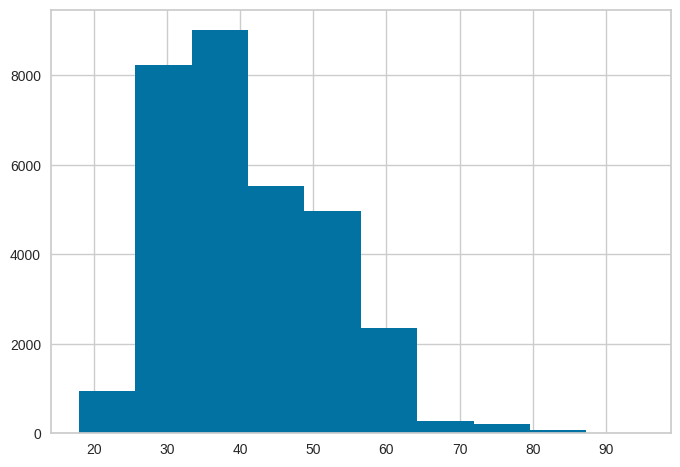

In [9]:
get_config('X_train_transformed')['age'].hist()


<Axes: >

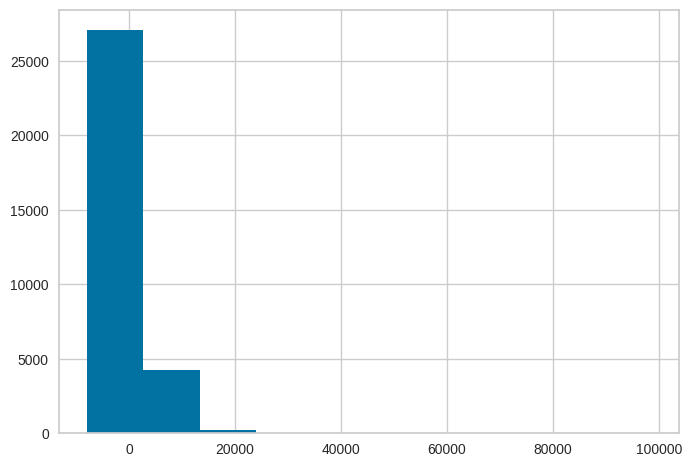

In [23]:
get_config('X_train')['balance'].hist()

(array([21320.,  3710.,  1571.,   884.,   443.,   327.,   172.,   128.,
          101.,    54.]),
 array([    0.,  1500.,  3000.,  4500.,  6000.,  7500.,  9000., 10500.,
        12000., 13500., 15000.]),
 <BarContainer object of 10 artists>)

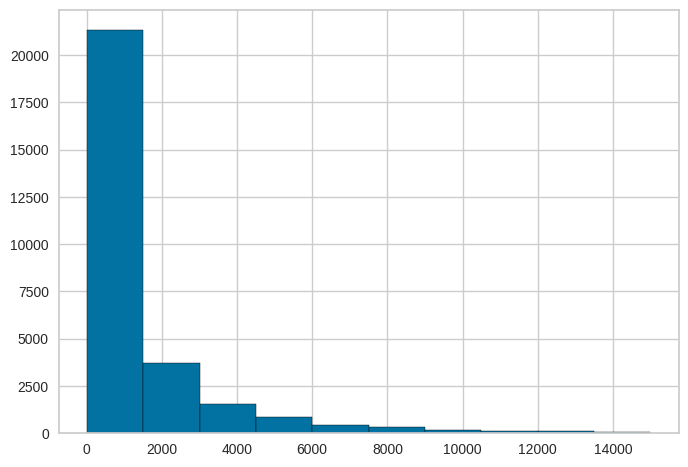

In [24]:
import matplotlib.pyplot as plt
plt.hist(get_config('X_train_transformed')['balance'], edgecolor='black', range=[0, 15000])

(array([21320.,  3710.,  1571.,   884.,   443.,   327.,   172.,   128.,
          101.,    54.]),
 array([    0.,  1500.,  3000.,  4500.,  6000.,  7500.,  9000., 10500.,
        12000., 13500., 15000.]),
 <BarContainer object of 10 artists>)

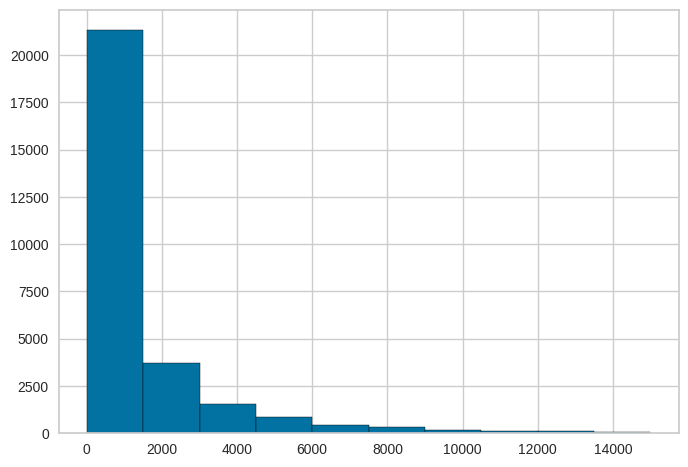

In [25]:
plt.hist(get_config('X_train')['balance'], edgecolor='black', range=[0, 15000])

(array([17333.,  8819.,  2842.,  1278.,   638.,   337.,   173.,   110.,
           37.,    37.]),
 array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.,
        1800., 2000.]),
 <BarContainer object of 10 artists>)

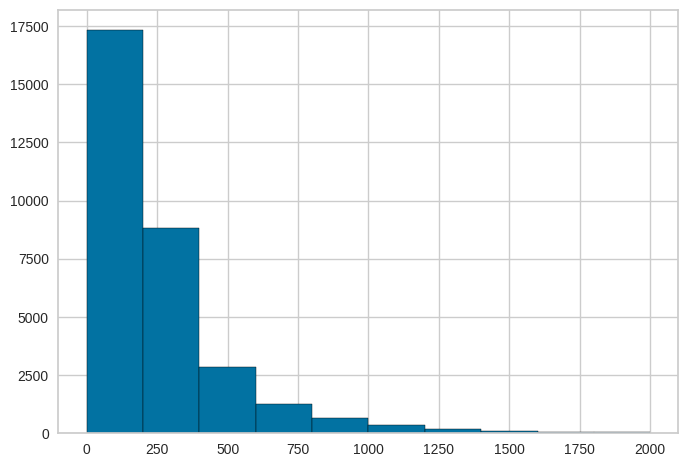

In [28]:
plt.hist(get_config('X_train_transformed')['duration'], edgecolor='black', range=[0, 2000])

(array([8506., 3949., 2773., 1989., 1493., 1199., 1007.,  781.,  690.,
         591.]),
 array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.,
        1800., 2000.]),
 <BarContainer object of 10 artists>)

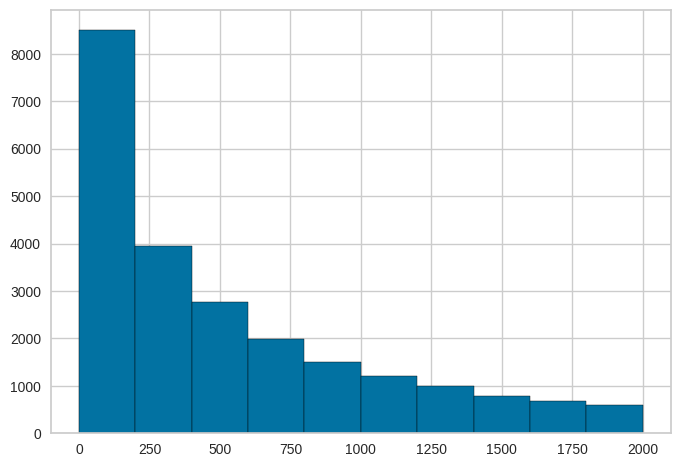

In [29]:
plt.hist(get_config('X_train')['balance'], edgecolor='black', range=[0, 2000])

In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9999,1.0000,1.0000,0.9981,0.9991,0.9990,0.9990,1.2770
gbc,Gradient Boosting Classifier,0.9999,0.9999,0.9991,0.9981,0.9986,0.9985,0.9985,3.0420
xgboost,Extreme Gradient Boosting,0.9999,1.0000,1.0000,0.9981,0.9991,0.9990,0.9990,0.5590
lightgbm,Light Gradient Boosting Machine,0.9999,1.0000,1.0000,0.9981,0.9991,0.9990,0.9990,0.9200
catboost,CatBoost Classifier,0.9999,1.0000,1.0000,0.9981,0.9991,0.9990,0.9990,9.8070
dt,Decision Tree Classifier,0.9997,0.9967,0.9934,0.9981,0.9957,0.9956,0.9956,0.1110
rf,Random Forest Classifier,0.9996,1.0000,0.9905,0.9981,0.9943,0.9941,0.9941,1.2870
et,Extra Trees Classifier,0.9962,0.9999,0.8876,0.9989,0.9397,0.9378,0.9396,1.6630
svm,SVM - Linear Kernel,0.9925,0.0000,0.7986,0.9738,0.8750,0.8712,0.8771,0.1220
lr,Logistic Regression,0.9863,0.9973,0.6153,0.9637,0.7504,0.7437,0.7639,0.4960


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [41]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbc','ada', 'xgboost', 'lightgbm', 'catboost'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9999,0.9999,0.9991,0.9981,0.9986,0.9985,0.9985,2.8740
ada,Ada Boost Classifier,0.9999,1.0000,1.0000,0.9981,0.9991,0.9990,0.9990,1.0270
xgboost,Extreme Gradient Boosting,0.9999,1.0000,1.0000,0.9981,0.9991,0.9990,0.9990,0.5540
lightgbm,Light Gradient Boosting Machine,0.9999,1.0000,1.0000,0.9981,0.9991,0.9990,0.9990,0.7070
catboost,CatBoost Classifier,0.9999,1.0000,1.0000,0.9981,0.9991,0.9990,0.9990,9.4050
dt,Decision Tree Classifier,0.9997,0.9967,0.9934,0.9981,0.9957,0.9956,0.9956,0.7980
rf,Random Forest Classifier,0.9996,1.0000,0.9905,0.9981,0.9943,0.9941,0.9941,1.2130
et,Extra Trees Classifier,0.9962,0.9999,0.8876,0.9989,0.9397,0.9378,0.9396,1.6170


Processing:   0%|          | 0/37 [00:00<?, ?it/s]

In [ ]:
compare_tree_models

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
compare_tree_models_results = pull()
compare_tree_models_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9999,0.9999,0.9991,0.9981,0.9986,0.9985,0.9985,3.023
xgboost,Extreme Gradient Boosting,0.9999,1.0000,1.0000,0.9981,0.9991,0.9990,0.9990,0.541
lightgbm,Light Gradient Boosting Machine,0.9999,1.0000,1.0000,0.9981,0.9991,0.9990,0.9990,1.572
catboost,CatBoost Classifier,0.9999,1.0000,1.0000,0.9981,0.9991,0.9990,0.9990,9.802
dt,Decision Tree Classifier,0.9997,0.9967,0.9934,0.9981,0.9957,0.9956,0.9956,0.114
rf,Random Forest Classifier,0.9996,1.0000,0.9905,0.9981,0.9943,0.9941,0.9941,1.291
et,Extra Trees Classifier,0.9962,0.9999,0.8876,0.9989,0.9397,0.9378,0.9396,1.686


In [ ]:
best_recall_models_top3 = compare_models(sort = 'Recall', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9999,1.0000,1.0000,0.9981,0.9991,0.9990,0.9990,1.3120
xgboost,Extreme Gradient Boosting,0.9999,1.0000,1.0000,0.9981,0.9991,0.9990,0.9990,0.6690
lightgbm,Light Gradient Boosting Machine,0.9999,1.0000,1.0000,0.9981,0.9991,0.9990,0.9990,1.0610
catboost,CatBoost Classifier,0.9999,1.0000,1.0000,0.9981,0.9991,0.9990,0.9990,9.4650
gbc,Gradient Boosting Classifier,0.9999,0.9999,0.9991,0.9981,0.9986,0.9985,0.9985,3.1020
dt,Decision Tree Classifier,0.9997,0.9967,0.9934,0.9981,0.9957,0.9956,0.9956,0.1130
nb,Naive Bayes,0.3214,0.8884,0.9915,0.0467,0.0891,0.0270,0.1149,0.1100
rf,Random Forest Classifier,0.9996,1.0000,0.9905,0.9981,0.9943,0.9941,0.9941,1.3180
qda,Quadratic Discriminant Analysis,0.4916,0.7706,0.9867,0.0613,0.1153,0.0559,0.1668,0.1740
et,Extra Trees Classifier,0.9962,0.9999,0.8876,0.9989,0.9397,0.9378,0.9396,1.7680


Processing:   0%|          | 0/71 [00:00<?, ?it/s]

In [ ]:
best_recall_models_top3

[AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                    estimator=None, learning_rate=1.0, n_estimators=50,
                    random_state=123),
 XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device='cpu', early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=-1,
               num_parallel_tree=None, objective='binary:logistic', ...),
 LGBMClassifier(boosting_type='gbdt'

In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9848,0.9986,0.5660,0.9677,0.7143,0.7070,0.7340
1,0.9877,0.9975,0.6604,0.9589,0.7821,0.7760,0.7903
2,0.9861,0.9965,0.6132,0.9559,0.7471,0.7403,0.7597
3,0.9867,0.9975,0.6132,0.9848,0.7558,0.7494,0.7717
4,0.9870,0.9966,0.6321,0.9710,0.7657,0.7594,0.7779
5,0.9852,0.9975,0.6038,0.9275,0.7314,0.7241,0.7418
6,0.9852,0.9981,0.5566,1.0000,0.7152,0.7082,0.7404
7,0.9851,0.9977,0.6000,0.9265,0.7283,0.7210,0.7391
8,0.9870,0.9939,0.6476,0.9444,0.7684,0.7619,0.7763


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
lr_results = pull()
print(type(lr_results))
lr_results

<class 'pandas.core.frame.DataFrame'>


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9848,0.9986,0.5660,0.9677,0.7143,0.7070,0.7340
1,0.9877,0.9975,0.6604,0.9589,0.7821,0.7760,0.7903
2,0.9861,0.9965,0.6132,0.9559,0.7471,0.7403,0.7597
3,0.9867,0.9975,0.6132,0.9848,0.7558,0.7494,0.7717
4,0.9870,0.9966,0.6321,0.9710,0.7657,0.7594,0.7779
5,0.9852,0.9975,0.6038,0.9275,0.7314,0.7241,0.7418
6,0.9852,0.9981,0.5566,1.0000,0.7152,0.7082,0.7404
7,0.9851,0.9977,0.6000,0.9265,0.7283,0.7210,0.7391
8,0.9870,0.9939,0.6476,0.9444,0.7684,0.7619,0.7763


In [ ]:
lr = create_model('lr', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9845,0.9967,0.5597,0.9563,0.7061,0.6987,0.7253
1,0.9864,0.9977,0.6176,0.9646,0.7530,0.7464,0.7661
2,0.9857,0.9967,0.6006,0.9550,0.7374,0.7304,0.7513
Mean,0.9855,0.9971,0.5926,0.9586,0.7322,0.7252,0.7475
Std,0.0008,0.0004,0.0243,0.0043,0.0195,0.0198,0.0169


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
create_model('lr', C = 0.5, l1_ratio = 0.15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9804,0.9970,0.4340,0.9583,0.5974,0.5888,0.6379
1,0.9817,0.9967,0.4811,0.9444,0.6375,0.6291,0.6671
2,0.9801,0.9955,0.4623,0.8909,0.6087,0.5995,0.6338
3,0.9826,0.9957,0.4906,0.9811,0.6541,0.6462,0.6874
4,0.9836,0.9949,0.5283,0.9655,0.6829,0.6752,0.7078
5,0.9814,0.9963,0.5000,0.8983,0.6424,0.6336,0.6625
6,0.9804,0.9958,0.4151,1.0000,0.5867,0.5784,0.6378
7,0.9817,0.9951,0.5048,0.8983,0.6463,0.6377,0.6658
8,0.9842,0.9926,0.5619,0.9365,0.7024,0.6948,0.7188


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.15, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
create_model('lr', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9994,0.9906,0.9811,1.0000,0.9905,0.9901,0.9902
2,0.9994,0.9997,1.0000,0.9815,0.9907,0.9903,0.9904
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9994,0.9906,0.9811,1.0000,0.9905,0.9901,0.9902
5,0.9997,0.9953,0.9906,1.0000,0.9953,0.9951,0.9951
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9997,0.9952,0.9905,1.0000,0.9952,0.9951,0.9951
8,0.9997,0.9952,0.9905,1.0000,0.9952,0.9951,0.9951


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9994,0.9997,1.0000,0.9815,0.9907,0.9903,0.9904
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')

In [ ]:
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9997,0.9953,0.9906,1.0000,0.9953,0.9951,0.9951
2,0.9994,0.9997,1.0000,0.9815,0.9907,0.9903,0.9904
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9994,0.9906,0.9811,1.0000,0.9905,0.9901,0.9902
5,0.9997,0.9953,0.9906,1.0000,0.9953,0.9951,0.9951
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 7 candidates, totalling 70 fits


In [ ]:
tuned_dt, tuner = tune_model(dt, return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9994,0.9997,1.0000,0.9815,0.9907,0.9903,0.9904
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_samples_leaf=5,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')

In [ ]:
tuner

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(exclude=None,
                                                                 include=['age',
                                                                          'balance',
                                                                          'day_of_week',
                                                                          'duration',
                                                                          'campaign',
                                                                          'pdays',
                                                                          'previous',
                                                                          'job_admin',
                                                                          'job_blue-collar',
                                                                          'job_entrepreneur',
                                                                          'job_housemaid...
                                        'actual_estimator__max_features': [1.0,
                                                                           'sqrt',
                                                                           'log2'],
                                        'actual_estimator__min_impurity_decrease': [0,
                                                                                    0.0001,
                                                                                    0.001,
                                                                                    0.01,
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10]},
                   pre_dispatch='2*n_jobs', random_state=123, refit=False,
                   return_train_score=False, scoring='accuracy', verbose=1)

In [ ]:
tuned_dt = tune_model(dt, search_library = 'optuna')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9994,0.9997,1.0000,0.9815,0.9907,0.9903,0.9904
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
ensemble_model(dt, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9994,1.0000,0.9811,1.0000,0.9905,0.9901,0.9902
2,0.9994,0.9997,1.0000,0.9815,0.9907,0.9903,0.9904
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9997,1.0000,0.9906,1.0000,0.9953,0.9951,0.9951
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9997,1.0000,0.9905,1.0000,0.9952,0.9951,0.9951


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingClassifier(base_estimator='deprecated', bootstrap=True,
                  bootstrap_features=False,
                  estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   random_state=123,
                                                   splitter='best'),
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=123, verbose=0,
                  warm_start=False)

In [ ]:
ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9994,0.9906,0.9811,1.0000,0.9905,0.9901,0.9902
2,0.9994,0.9997,1.0000,0.9815,0.9907,0.9903,0.9904
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9994,0.9906,0.9811,1.0000,0.9905,0.9901,0.9902
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9997,0.9952,0.9905,1.0000,0.9952,0.9951,0.9951


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    random_state=123,
                                                    splitter='best'),
                   learning_rate=1.0, n_estimators=10, random_state=123)

In [39]:
best_recall_models_top3

NameError: ignored

In [ ]:
blend_models(best_recall_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9994,0.9999,1.0000,0.9815,0.9907,0.9903,0.9904
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingClassifier(estimators=[('Ada Boost Classifier',
                              AdaBoostClassifier(algorithm='SAMME.R',
                                                 base_estimator='deprecated',
                                                 estimator=None,
                                                 learning_rate=1.0,
                                                 n_estimators=50,
                                                 random_state=123)),
                             ('Extreme Gradient Boosting',
                              XGBClassifier(base_score=None, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device='...
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=123, reg_alpha=0.0,
                                             reg_lambda=0.0, subsample=1.0,
                                             subsample_for_bin=200000,
                                             subsample_freq=0))],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='soft', weights=None)

In [38]:
stack_models(best_recall_models_top3)

NameError: ignored

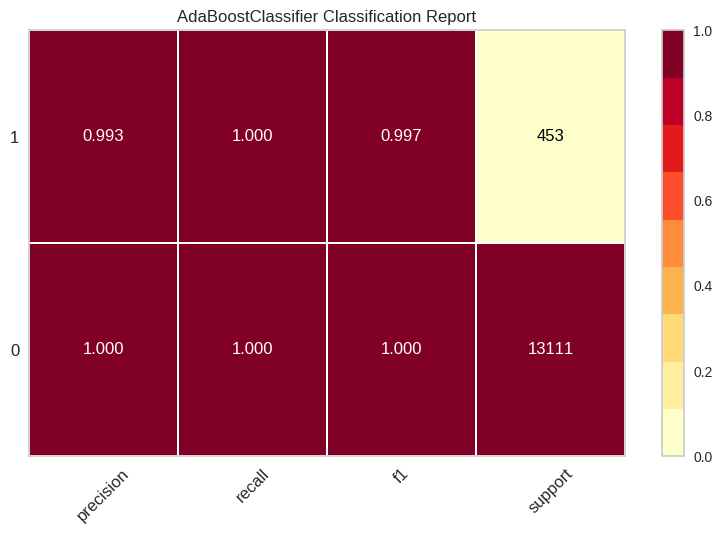

In [ ]:
plot_model(best, plot = 'class_report')

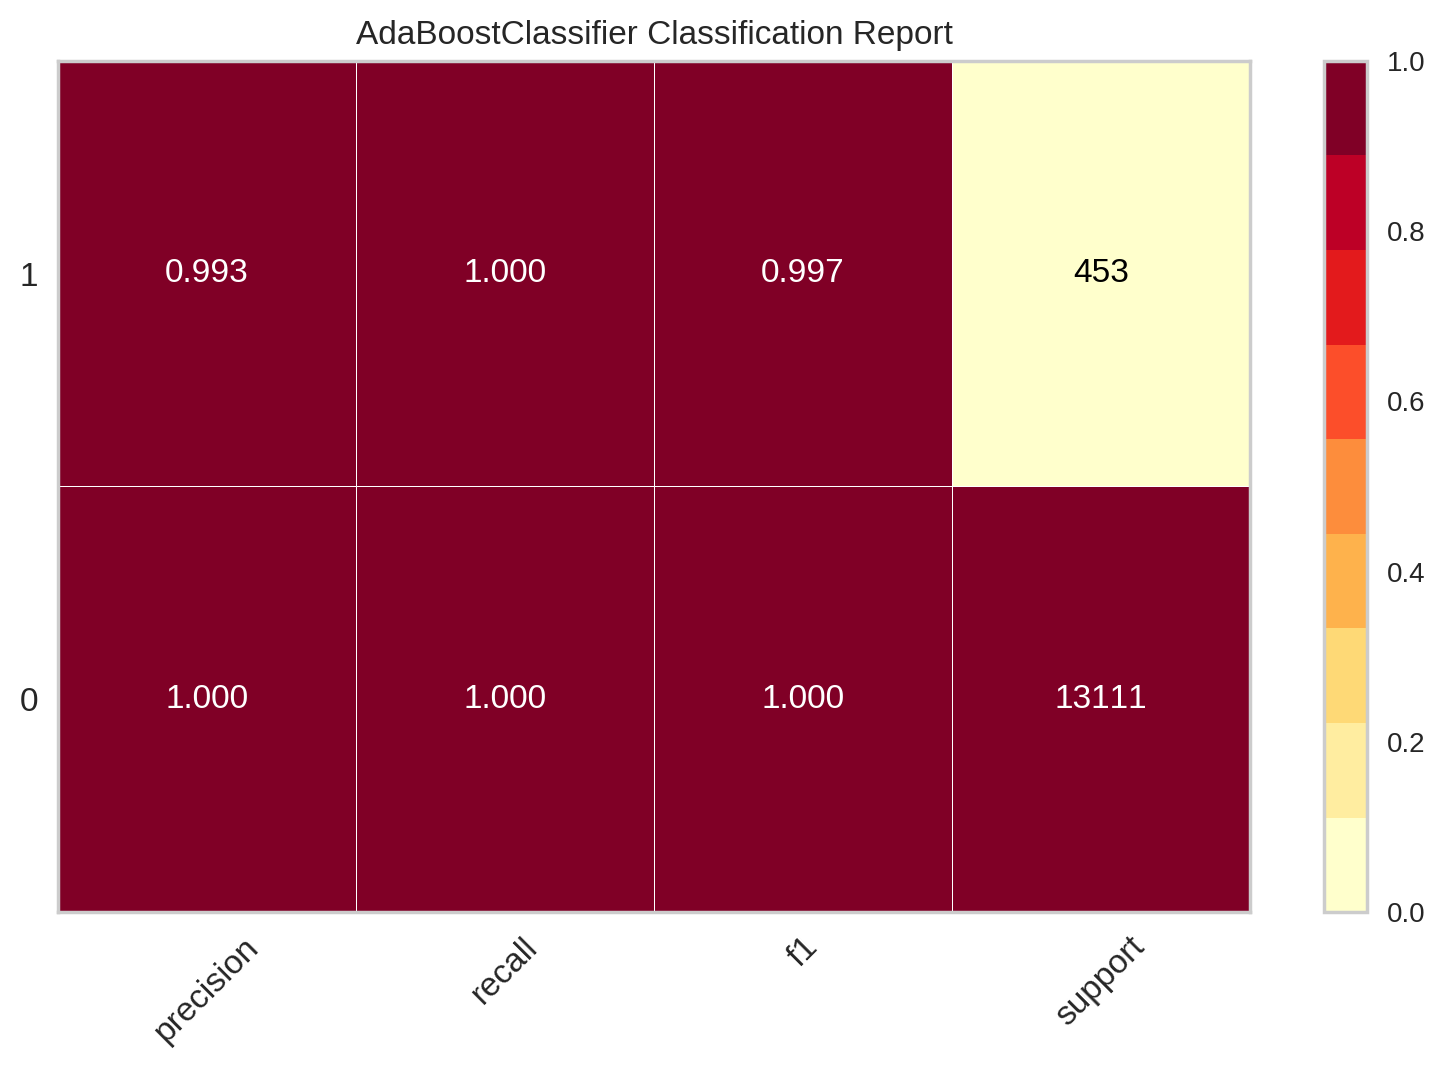

In [ ]:
plot_model(best, plot = 'class_report', scale = 2)

In [ ]:
plot_model(best, plot = 'class_report', save=True)

'Class Report.png'

In [ ]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9994,0.9997,1.0000,0.9815,0.9907,0.9903,0.9904
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

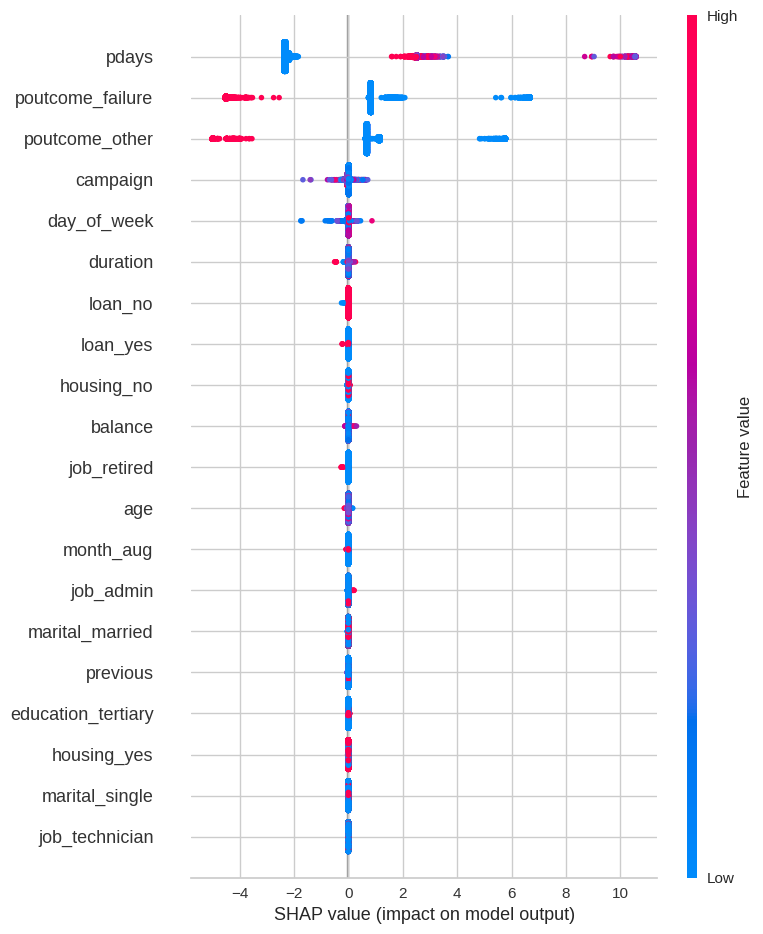

In [ ]:
interpret_model(lightgbm, plot = 'summary')

In [ ]:
interpret_model(lightgbm, plot = 'reason', observation = 1)

In [ ]:
lb = get_leaderboard()
lb

Processing:   0%|          | 0/58 [00:00<?, ?it/s]

,Model Name,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Index,,,,,,,,,
0,Logistic Regression,"(TransformerWrapper(exclude=None,\n ...",0.9863,0.9973,0.6153,0.9637,0.7504,0.7437,0.7639
1,K Neighbors Classifier,"(TransformerWrapper(exclude=None,\n ...",0.9685,0.7784,0.1522,0.6191,0.2439,0.2338,0.2961
2,Naive Bayes,"(TransformerWrapper(exclude=None,\n ...",0.3214,0.8884,0.9915,0.0467,0.0891,0.0270,0.1149
3,Decision Tree Classifier,"(TransformerWrapper(exclude=None,\n ...",0.9997,0.9967,0.9934,0.9981,0.9957,0.9956,0.9956
4,SVM - Linear Kernel,"(TransformerWrapper(exclude=None,\n ...",0.9925,0.0000,0.7986,0.9738,0.8750,0.8712,0.8771
5,Ridge Classifier,"(TransformerWrapper(exclude=None,\n ...",0.9712,0.0000,0.1947,0.7842,0.3099,0.3007,0.3801
6,Random Forest Classifier,"(TransformerWrapper(exclude=None,\n ...",0.9996,1.0000,0.9905,0.9981,0.9943,0.9941,0.9941
7,Quadratic Discriminant Analysis,"(TransformerWrapper(exclude=None,\n ...",0.4916,0.7706,0.9867,0.0613,0.1153,0.0559,0.1668
8,Ada Boost Classifier,"(TransformerWrapper(exclude=None,\n ...",0.9999,1.0000,1.0000,0.9981,0.9991,0.9990,0.9990


In [ ]:
lb.sort_values(by='F1', ascending=False)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'balance', 'day_of_week',
                                             'duration', 'campaign', 'pdays',
                                             'previous', 'job_admin',
                                             'job_blue-collar',
                                             'job_entrepreneur',
                                             'job_housemaid', 'job_management',
                                             'job_retired', 'job_self-employed',
                                             'job_services', 'job_student',
                                             'job_technician', 'job_unemp...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None, random_state=123,
                                reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0)]],
         verbose=False)

In [ ]:
automl()

AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=None, learning_rate=1.0, n_estimators=50,
                   random_state=123)

In [ ]:
dashboard(dt, display_format ='inline')

Note: model_output=='probability', so assuming that raw shap output of DecisionTreeClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating shap interaction values... (this may take a while)
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating pred_percentiles...
Calculating 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install gradio

create_app(best)

ModuleNotFoundError: ignored

In [ ]:
create_api(best, api_name = 'bank_api')

ModuleNotFoundError: ignored

In [ ]:
create_docker('bank_api')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            


In [ ]:
final_best = finalize_model(best)

In [ ]:
final_best

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'balance', 'day_of_week',
                                             'duration', 'campaign', 'pdays',
                                             'previous', 'job_admin',
                                             'job_blue-collar',
                                             'job_entrepreneur',
                                             'job_housemaid', 'job_management',
                                             'job_retired', 'job_self-employed',
                                             'job_services', 'job_student',
                                             'job_technician', 'job_unemp...
                                    transformer=MinMaxScaler(clip=False,
                                                             copy=True,
                                                             feature_range=(0,
                                                                            1)))),
                ('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('actual_estimator',
                 AdaBoostClassifier(algorithm='SAMME.R',
                                    base_estimator='deprecated', estimator=None,
                                    learning_rate=1.0, n_estimators=50,
                                    random_state=123))],
         verbose=False)

In [ ]:
print(convert_model(dt, language = 'java'))

public class Model {
    public static double[] score(double[] input) {
        double[] var0;
        if (input[5] <= 0.0052631578873842955) {
            if (input[6] <= 0.019999999552965164) {
                if (input[5] <= 0.0011695906287059188) {
                    var0 = new double[] {1.0, 0.0};
                } else {
                    if (input[40] <= 0.5) {
                        var0 = new double[] {1.0, 0.0};
                    } else {
                        var0 = new double[] {0.0, 1.0};
                    }
                }
            } else {
                if (input[45] <= 0.5) {
                    var0 = new double[] {0.0, 1.0};
                } else {
                    var0 = new double[] {1.0, 0.0};
                }
            }
        } else {
            if (input[44] <= 0.5) {
                if (input[45] <= 0.5) {
                    if (input[5] <= 0.5912280678749084) {
                        if (input[3] <= 0.19753964990377426) {
         

In [ ]:
save_model(best, 'bank_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'balance', 'day_of_week',
                                              'duration', 'campaign', 'pdays',
                                              'previous', 'job_admin',
                                              'job_blue-collar',
                                              'job_entrepreneur',
                                              'job_housemaid', 'job_management',
                                              'job_retired', 'job_self-employed',
                                              'job_services', 'job_student',
                                              'job_technician', 'job_unemp...
                                     transformer=MinMaxScaler(clip=False,
                                                              copy=True,
                                             

In [ ]:
loaded_from_disk = load_model('bank_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'balance', 'day_of_week',
                                             'duration', 'campaign', 'pdays',
                                             'previous', 'job_admin',
                                             'job_blue-collar',
                                             'job_entrepreneur',
                                             'job_housemaid', 'job_management',
                                             'job_retired', 'job_self-employed',
                                             'job_services', 'job_student',
                                             'job_technician'...
                                    transformer=MinMaxScaler(clip=False,
                                                             copy=True,
                                                             feature_range=(0,
                                                                            1)))),
                ('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('trained_model',
                 AdaBoostClassifier(algorithm='SAMME.R',
                                    base_estimator='deprecated', estimator=None,
                                    learning_rate=1.0, n_estimators=50,
                                    random_state=123))],
         verbose=False)

In [ ]:
save_experiment('bank_experiment')

In [ ]:
exp_from_disk = load_experiment('bank_experiment', data=X_encoded)

,Description,Value
0,Session id,123
1,Target,poutcome_success
2,Target type,Binary
3,Original data shape,"(45211, 47)"
4,Transformed data shape,"(45211, 47)"
5,Transformed train set shape,"(31647, 47)"
6,Transformed test set shape,"(13564, 47)"
7,Numeric features,46
8,Preprocess,True
9,Imputation type,simple


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

categorical_columns = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_columns)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.97      0.95      7952
         yes       0.67      0.40      0.50      1091

    accuracy                           0.90      9043
   macro avg       0.80      0.68      0.72      9043
weighted avg       0.89      0.90      0.89      9043



In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

categorical_columns = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_columns)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
ada = AdaBoostClassifier(random_state=123)

# Fit the classifier to the training data
ada.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = ada.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.97      0.94      7952
         yes       0.63      0.37      0.47      1091

    accuracy                           0.90      9043
   macro avg       0.77      0.67      0.71      9043
weighted avg       0.88      0.90      0.89      9043

